In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

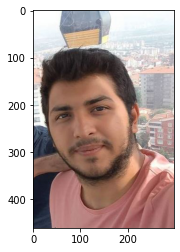

In [21]:
img=image.load_img("/content/drive/MyDrive/Colab Notebooks/Dataset/training/happy/3.JPG")
plt.imshow(img)

In [22]:
cv2.imread("/content/drive/MyDrive/Colab Notebooks/Dataset/training/happy/3.JPG").shape

(461, 298, 3)

In [46]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [70]:
train_veri = train.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Dataset/training',  # train dosyalarımız
        target_size=(200, 200),  # tüm imageleri 200x200 yap
        batch_size=128,
        
        class_mode='binary')

validation_veri = train.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Dataset/validation',  
        target_size=(200, 200),  
        batch_size=128,
        class_mode='binary')

Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [81]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [82]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [83]:
history = model.fit(
      train_veri,
      steps_per_epoch=1,  
      epochs=10,
      validation_data = validation_veri)

Epoch 1/10
1/1 [==============================] - 1s 816ms/step - loss: 0.6918 - accuracy: 0.5714 - val_loss: 0.1548 - val_accuracy: 0.9286
Epoch 2/10
1/1 [==============================] - 0s 412ms/step - loss: 0.1548 - accuracy: 0.9286 - val_loss: 11.0777 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 429ms/step - loss: 11.0777 - accuracy: 0.5000 - val_loss: 12.9760 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 428ms/step - loss: 12.9760 - accuracy: 0.5000 - val_loss: 1.0918 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 424ms/step - loss: 1.0918 - accuracy: 0.5000 - val_loss: 1.2365 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 427ms/step - loss: 1.2365 - accuracy: 0.5000 - val_loss: 1.3734 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 444ms/step - loss: 1.3734 - accuracy: 0.5000 - val_loss: 0.4375 - val_accuracy: 0.7857
Epoch 8/10
1/1 [

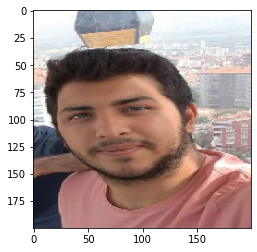

Mutlu Gözüküyor.


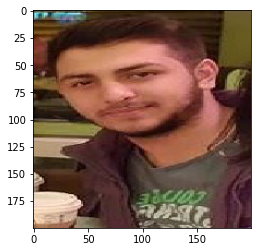

Mutlu Gözüküyor.


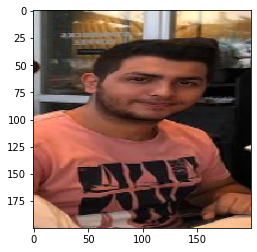

Mutlu Gözüküyor.


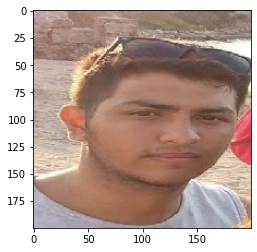

Mutlu Gözüküyor.


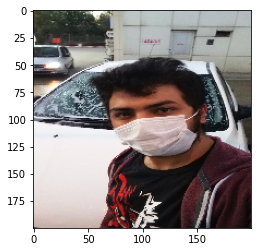

Mutlu Görünmüyor...


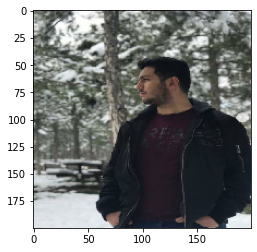

Mutlu Gözüküyor.


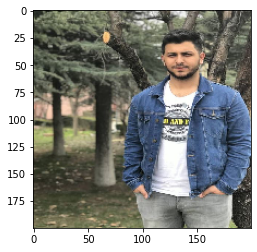

Mutlu Gözüküyor.


In [86]:
dir_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/testing"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("Mutlu Gözüküyor.")
    else:
        print("Mutlu Görünmüyor...")